# Multiple DiseaseModel Comparison

This notebook aims to explore, preprocess, and model a dataset to predict the likelihood of multiple. We will compare multiple algorithms to find the best performer based on accuracy, precision, recall, and F1 score.
The dataset used in this notebook is from Kaggle and can be found [here](https://www.kaggle.com/datasets/walterconway/covid-flu-cold-symptoms).

## Introduction

Covid, Allergy, Cold and Flu are common diseases that can be easily confused due to their similar symptoms. This notebook aims to predict the likelihood of a patient having Covid, Allergy, Cold or Flu based on their symptoms. We will compare the performance of multiple algorithms to find the best performer based on accuracy, precision, recall, and F1 score.

## Importing Libraries

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder



## Data Loading

In [119]:
# Load the dataset for Training
multiple_data_train = pd.read_csv('../Datasets/COVID-FLU-ALLERGY.csv')

# Display the first 5 rows of the dataframe
multiple_data_train.head()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,...,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE,TYPE
0,0,0,1,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,1,ALLERGY
1,0,0,1,0,0,0,0,0,0,0,...,0,1,0,1,0,1,1,1,1,ALLERGY
2,0,1,1,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,ALLERGY
3,0,0,0,1,1,0,0,0,0,0,...,0,1,1,0,0,1,0,1,1,ALLERGY
4,0,0,1,0,1,0,0,0,0,0,...,0,1,1,0,1,0,1,1,1,ALLERGY


## Data Exploration

In [120]:
#Checking the shape of the dataset Training
multiple_data_train.shape

(44453, 21)

In [121]:
#Basic information about the dataset Training
multiple_data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44453 entries, 0 to 44452
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   COUGH                 44453 non-null  int64 
 1   MUSCLE_ACHES          44453 non-null  int64 
 2   TIREDNESS             44453 non-null  int64 
 3   SORE_THROAT           44453 non-null  int64 
 4   RUNNY_NOSE            44453 non-null  int64 
 5   STUFFY_NOSE           44453 non-null  int64 
 6   FEVER                 44453 non-null  int64 
 7   NAUSEA                44453 non-null  int64 
 8   VOMITING              44453 non-null  int64 
 9   DIARRHEA              44453 non-null  int64 
 10  SHORTNESS_OF_BREATH   44453 non-null  int64 
 11  DIFFICULTY_BREATHING  44453 non-null  int64 
 12  LOSS_OF_TASTE         44453 non-null  int64 
 13  LOSS_OF_SMELL         44453 non-null  int64 
 14  ITCHY_NOSE            44453 non-null  int64 
 15  ITCHY_EYES            44453 non-null

In [122]:
#Summary statistics of the dataset Training
multiple_data_train.describe()

,COUGH,MUSCLE_ACHES,TIREDNESS,SORE_THROAT,RUNNY_NOSE,STUFFY_NOSE,FEVER,NAUSEA,VOMITING,DIARRHEA,SHORTNESS_OF_BREATH,DIFFICULTY_BREATHING,LOSS_OF_TASTE,LOSS_OF_SMELL,ITCHY_NOSE,ITCHY_EYES,ITCHY_MOUTH,ITCHY_INNER_EAR,SNEEZING,PINK_EYE
count,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000,44453.000000
mean,0.520662,0.519762,0.519897,0.519358,0.496232,0.495850,0.325400,0.324253,0.324523,0.323465,0.323893,0.324455,0.422986,0.423234,0.184285,0.184285,0.184285,0.184285,0.519313,0.184240
std,0.499579,0.499615,0.499610,0.499631,0.499991,0.499988,0.468529,0.468100,0.468201,0.467804,0.467965,0.468176,0.494039,0.494077,0.387720,0.387720,0.387720,0.387720,0.499633,0.387684
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [123]:
#Checking for unique values in the dataset Training
multiple_data_train.nunique()

COUGH                   2
MUSCLE_ACHES            2
TIREDNESS               2
SORE_THROAT             2
RUNNY_NOSE              2
STUFFY_NOSE             2
FEVER                   2
NAUSEA                  2
VOMITING                2
DIARRHEA                2
SHORTNESS_OF_BREATH     2
DIFFICULTY_BREATHING    2
LOSS_OF_TASTE           2
LOSS_OF_SMELL           2
ITCHY_NOSE              2
ITCHY_EYES              2
ITCHY_MOUTH             2
ITCHY_INNER_EAR         2
SNEEZING                2
PINK_EYE                2
TYPE                    4
dtype: int64

In [124]:
#Checking Data Types Training
multiple_data_train.dtypes

COUGH                    int64
MUSCLE_ACHES             int64
TIREDNESS                int64
SORE_THROAT              int64
RUNNY_NOSE               int64
STUFFY_NOSE              int64
FEVER                    int64
NAUSEA                   int64
VOMITING                 int64
DIARRHEA                 int64
SHORTNESS_OF_BREATH      int64
DIFFICULTY_BREATHING     int64
LOSS_OF_TASTE            int64
LOSS_OF_SMELL            int64
ITCHY_NOSE               int64
ITCHY_EYES               int64
ITCHY_MOUTH              int64
ITCHY_INNER_EAR          int64
SNEEZING                 int64
PINK_EYE                 int64
TYPE                    object
dtype: object

In [125]:
#Checking for missing values in the dataset Training
multiple_data_train.isnull().sum()

COUGH                   0
MUSCLE_ACHES            0
TIREDNESS               0
SORE_THROAT             0
RUNNY_NOSE              0
STUFFY_NOSE             0
FEVER                   0
NAUSEA                  0
VOMITING                0
DIARRHEA                0
SHORTNESS_OF_BREATH     0
DIFFICULTY_BREATHING    0
LOSS_OF_TASTE           0
LOSS_OF_SMELL           0
ITCHY_NOSE              0
ITCHY_EYES              0
ITCHY_MOUTH             0
ITCHY_INNER_EAR         0
SNEEZING                0
PINK_EYE                0
TYPE                    0
dtype: int64

### Data Visualization

In [126]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

#### Initial Data Exploration

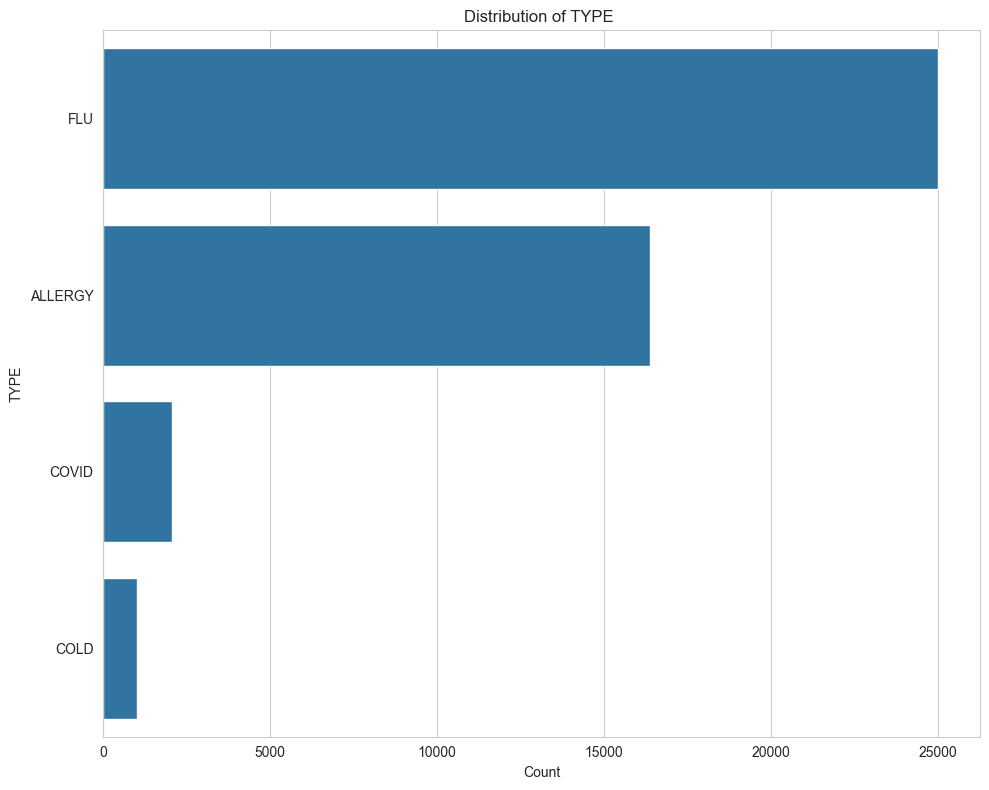

In [127]:
# Prepare the figure for the distribution of prognosis Training
plt.figure(figsize=(10, 8))
sns.countplot(y='TYPE', data=multiple_data_train, order = multiple_data_train['TYPE'].value_counts().index)
plt.title('Distribution of TYPE ')
plt.xlabel('Count')
plt.ylabel('TYPE')
plt.tight_layout()
plt.show()




### Attribute Information

## Data Preprocessing

### Handling Missing Values

In [128]:
# Check if BMI is imputed correctly
multiple_data_train.isnull().sum()

COUGH                   0
MUSCLE_ACHES            0
TIREDNESS               0
SORE_THROAT             0
RUNNY_NOSE              0
STUFFY_NOSE             0
FEVER                   0
NAUSEA                  0
VOMITING                0
DIARRHEA                0
SHORTNESS_OF_BREATH     0
DIFFICULTY_BREATHING    0
LOSS_OF_TASTE           0
LOSS_OF_SMELL           0
ITCHY_NOSE              0
ITCHY_EYES              0
ITCHY_MOUTH             0
ITCHY_INNER_EAR         0
SNEEZING                0
PINK_EYE                0
TYPE                    0
dtype: int64

In [129]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit the LabelEncoder on the 'TYPE' column of the training set
label_encoder.fit(multiple_data_train['TYPE'])

# Transform the 'TYPE' column of the training set
multiple_data_train['TYPE'] = label_encoder.transform(multiple_data_train['TYPE'])

### Splitting the Data

In [130]:
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X = multiple_data_train.drop(['TYPE', 'id'], axis=1).values
y = multiple_data_train['TYPE'].values

X_res, y_res = smote.fit_resample(X, y)
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)

for train_index, test_index in sss.split(X_res, y_res):
    X_train, X_test = X_res[train_index], X_res[test_index]
    y_train, y_test = y_res[train_index], y_res[test_index]

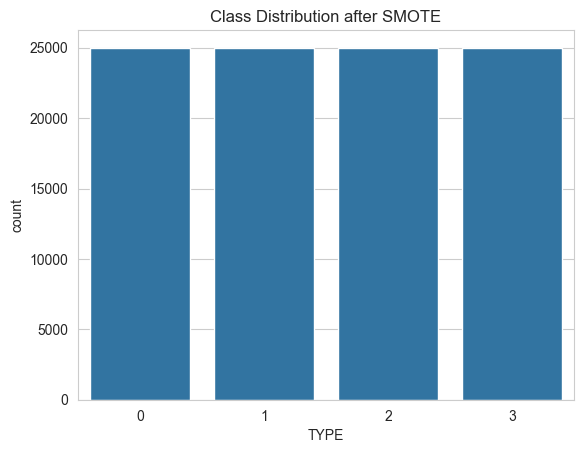

In [131]:
# Convert the resampled target data to a DataFrame for easier plotting
y_train_res_df = pd.DataFrame(y_res, columns=['TYPE'])

# Plot the distribution of the target variable after SMOTE
sns.countplot(x='TYPE', data=y_train_res_df)
plt.title('Class Distribution after SMOTE')
plt.show()

In [132]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='micro')  
    recall = recall_score(y_test, y_pred, average='micro')  
    f1 = f1_score(y_test, y_pred, average='micro')  

    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")

    
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title('Confusion Matrix')
    plt.show()

## Model Building

### Logistic Regression

Logistic Regression:


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9563
Precision: 0.9563
Recall: 0.9563
F1 Score: 0.9563


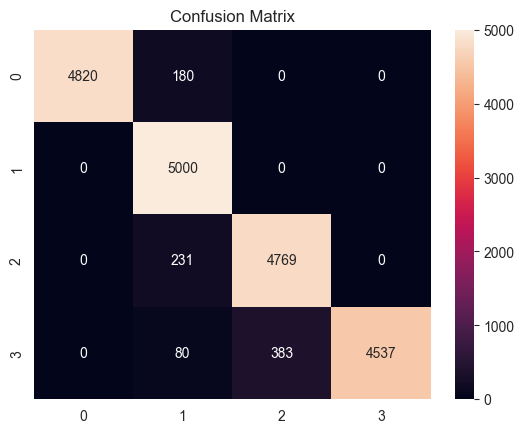

In [133]:
print("Logistic Regression:")
lr = LogisticRegression()
evaluate_model(lr, X_train, y_train, X_test, y_test)

### Decision Tree

Decision Trees:
Accuracy: 0.95575
Precision: 0.95575
Recall: 0.95575
F1 Score: 0.95575


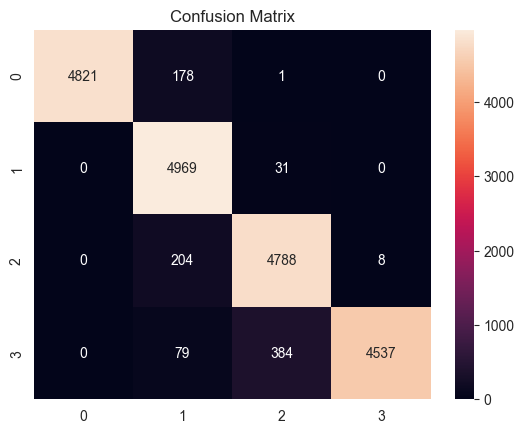

In [134]:
print("Decision Trees:")
dt = DecisionTreeClassifier()
evaluate_model(dt, X_train, y_train, X_test, y_test)

### Random Forest

Random Forest:
Accuracy: 0.95525
Precision: 0.95525
Recall: 0.95525
F1 Score: 0.95525


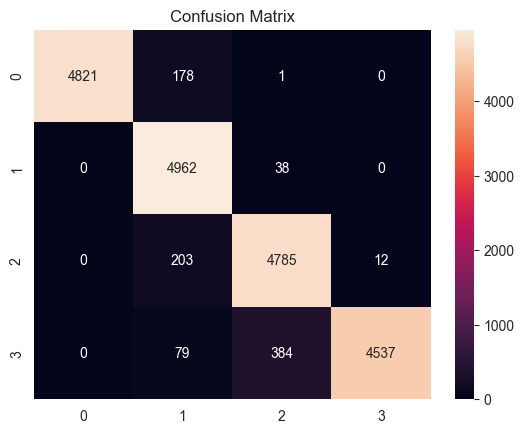

In [135]:
print("Random Forest:")
rf = RandomForestClassifier()
evaluate_model(rf, X_train, y_train, X_test, y_test)

### Support Vector Machine (SVM)

Support Vector Machines:
Accuracy: 0.9563
Precision: 0.9563
Recall: 0.9563
F1 Score: 0.9563


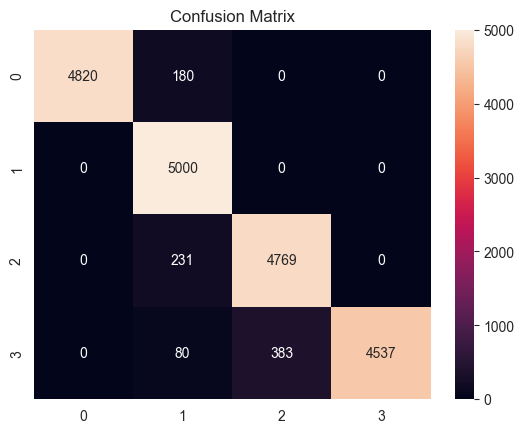

In [136]:
print("Support Vector Machines:")
svc = SVC()
evaluate_model(svc, X_train, y_train, X_test, y_test)

### Naive Bayes (GaussianNB)

Naive Bayes:
Accuracy: 0.9563
Precision: 0.9563
Recall: 0.9563
F1 Score: 0.9563


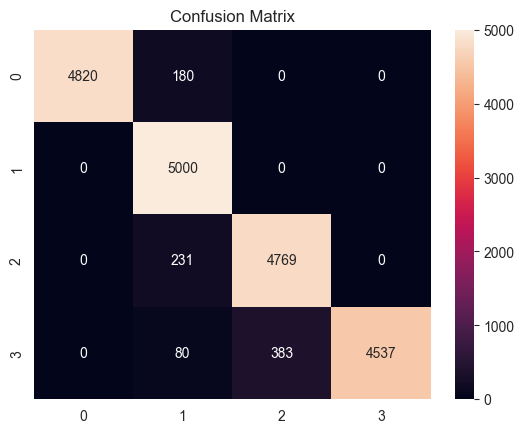

In [137]:
print("Naive Bayes:")
nb = GaussianNB()
evaluate_model(nb, X_train, y_train, X_test, y_test)

## Hyperparameter Tuning

## Grid Search

Logistic Regression with Grid Search:
Fitting 5 folds for each of 70 candidates, totalling 350 fits


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\

Best Parameters:  {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Fitting 5 folds for each of 70 candidates, totalling 350 fits


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
105 fits failed out of a total of 350.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\

Accuracy: 0.9563
Precision: 0.9563
Recall: 0.9563
F1 Score: 0.9563


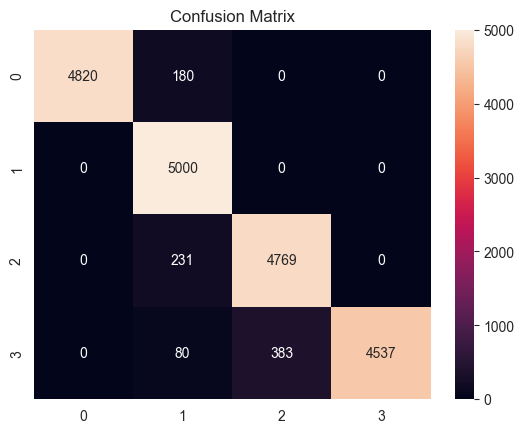

In [143]:
from sklearn.model_selection import GridSearchCV

print("Logistic Regression with Grid Search:")

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Create a base model
lr = LogisticRegression()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=lr, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the model
evaluate_model(grid_search, X_train, y_train, X_test, y_test)

c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


Best parameters for Decision Tree:  {'criterion': 'gini', 'max_depth': None}


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


Accuracy: 0.95575
Precision: 0.95575
Recall: 0.95575
F1 Score: 0.95575


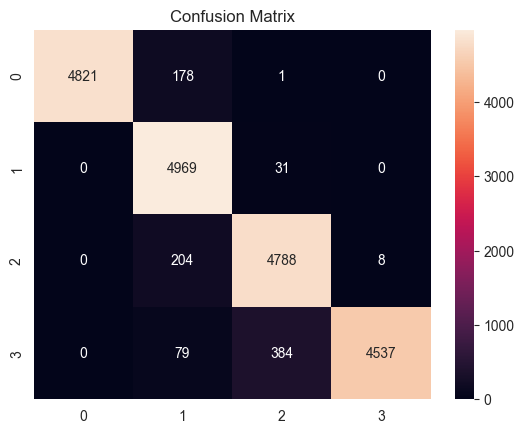

In [139]:

# Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='recall', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

print("Best parameters for Decision Tree: ", grid_search_dt.best_params_)
evaluate_model(grid_search_dt, X_train, y_train, X_test, y_test)

c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters for Random Forest:  {'criterion': 'gini', 'max_depth': None, 'n_estimators': 10}


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan]
  warnings.warn(


Accuracy: 0.9549
Precision: 0.9549
Recall: 0.9549
F1 Score: 0.9549


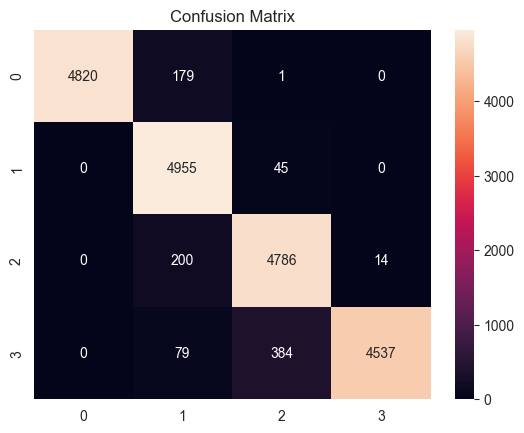

In [140]:
# Random Forest
param_grid_rf = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='recall', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest: ", grid_search_rf.best_params_)
evaluate_model(grid_search_rf, X_train, y_train, X_test, y_test)

c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters for Support Vector Machine:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}


c:\users\abuba\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Accuracy: 0.9563
Precision: 0.9563
Recall: 0.9563
F1 Score: 0.9563


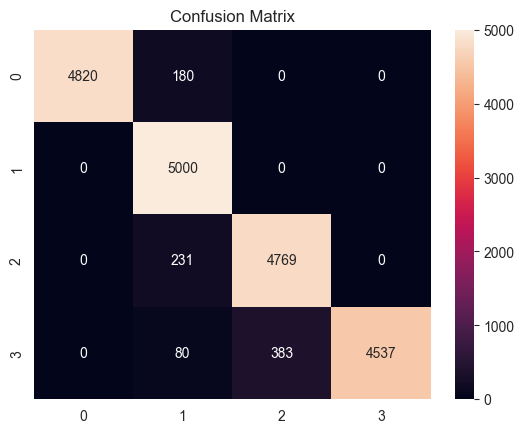

In [141]:
# Support Vector Machine
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
grid_search_svc = GridSearchCV(svc, param_grid_svc, cv=5, scoring='recall', n_jobs=-1)
grid_search_svc.fit(X_train, y_train)

print("Best parameters for Support Vector Machine: ", grid_search_svc.best_params_)
evaluate_model(grid_search_svc, X_train, y_train, X_test, y_test)

In [147]:
def predict_disease(symptoms):
    # Convert the symptoms dictionary to a DataFrame
    symptoms_df = pd.DataFrame([symptoms])

    # Remove the feature names from the DataFrame
    symptoms_df.columns = range(symptoms_df.shape[1])

    # Use the trained model to predict the disease
    prediction = nb.predict(symptoms_df)

    return prediction[0]

CLA_fields = ['cough', 'muscle_aches', 'tiredness', 'sore_throat', 'runny_nose', 'stuffy_nose', 'fever', 'nausea',
              'vomiting', 'diarrhea', 'shortness_of_breath', 'difficulty_breathing', 'loss_of_taste', 'loss_of_smell', 'itchy_nose',
              'itchy_eyes', 'itchy_mouth', 'itchy_inner_ear', 'sneezing', 'pink_eye']

symptoms = {symptom: 1 if input(f"Do you have {symptom}? (yes/no): ").lower() == 'yes' else 0 for symptom in CLA_fields}

print(predict_disease(symptoms))

1
